<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

<center> <h1>Trabajo semanal 2 </h1></center>
    
<font color=darkblue size=3>*Facundo N. Iglesias*</font>

<img src="./rsc/circuito.png"  /> 
<img src="./rsc/consignas.png"  /> 

### Resolución

In [6]:
from IPython.display import IFrame
IFrame("./rsc/resolucion.pdf", width=1000, height=1000)

\begin{equation}
\frac{V_2}{V_1} = - \frac{R_3}{R_1} \frac{\frac{1}{R_3²C²}}{s^2 + s \frac{1}{R_2C} + \frac{1}{R_3²C²}} 
\end{equation}

\begin{equation}
\frac{V_2}{V_1} = - K \frac{\omega_0²}{s^2 + s \frac{\omega_0}{Q} + \omega_0²} 
\end{equation}

\begin{equation}
\omega_0 = \frac{1}{R_3C} \space\space Q=\frac{R_2}{R_3} \space\space K=\frac{R_3}{R_1}
\end{equation}

Adoptando:
\begin{equation}
R_3 = 10k\Omega \space\space R_2 = 30k\Omega \space\space R_1=1k\Omega \space\space C= 100uF
\end{equation}

\begin{equation}
\omega_0 = 1 \space\space Q=3 \space\space 
\end{equation}

\begin{equation}
ganancia \space de \space 20dB\space \rightarrow \space K = 10
\end{equation}


### Tipo de filtro

\begin{equation}
s\rightarrow 0 => \frac{V_2}{V_1} = -K
\end{equation}

\begin{equation}
s\rightarrow \infty => \frac{V_2}{V_1} = 0
\end{equation}
El filtro es de tipo pasa bajos!

### Normalización en frecuencia

\begin{equation}
\Omega_\omega = \omega_0 =  \frac{1}{R_3C}
\end{equation}


\begin{equation}
\vec{s} = \frac{s}{\frac{1}{R_3C_1}} \rightarrow s= \frac{\vec{s}}{R_3C} 
\end{equation}

\begin{equation}
\frac{V_2}{V_1} = - \frac{R_3}{R_1} \frac{\frac{1}{R_3²C²}}{s^2 + s \frac{1}{R_2C} + \frac{1}{R_3²C²}} 
\end{equation}

\begin{equation}
\frac{V_2}{V_1} = - \frac{R_3}{R_1} \frac{1}{s^2 + \frac{R_3}{R_2}s + 1} 
\end{equation}



### Verificación con SymPy

In [56]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

In [57]:
Vi, Vo, Vx, Vy = sp.symbols("Vi, Vo, Vx, Vy")
Y1, Y2, Y3, Y4, YC, R1, R2, R3, R4, C = sp.symbols("Y1, Y2, Y3, Y4, YC, R1, R2, R3, R4, C")

sistema = sp.solve([ 
                Vi*Y1+Vx*Y2+Vo*Y3,
                Vx-Vo*YC/Y3
            ], 
            [Vi, Vo])

transf_func = sistema[Vo]/sistema[Vi]

tlp = transf_func.subs(Y1,1/R1)
tlp = tlp.subs(Y2,1/R2+ s*C)
tlp = tlp.subs(Y3,1/R3)
tlp = tlp.subs(Y4,1/R4)
tlp = tlp.subs(YC,s*C)

num, den = sp.fraction(sp.simplify(sp.expand(tlp)))
num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

tlp_final = sp.Mul(k,num/den, evaluate=False)

tlp_final

(-1/(C**2*R1*R3))/(s**2 + s/(C*R2) + 1/(C**2*R3**2))

In [63]:
tlp_final.limit(s,oo)

In [64]:
tlp_final.limit(s,0)

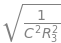

In [65]:
sqrt(wo)

### Simulación de función transferencia  con matplotlib

/home/facu/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


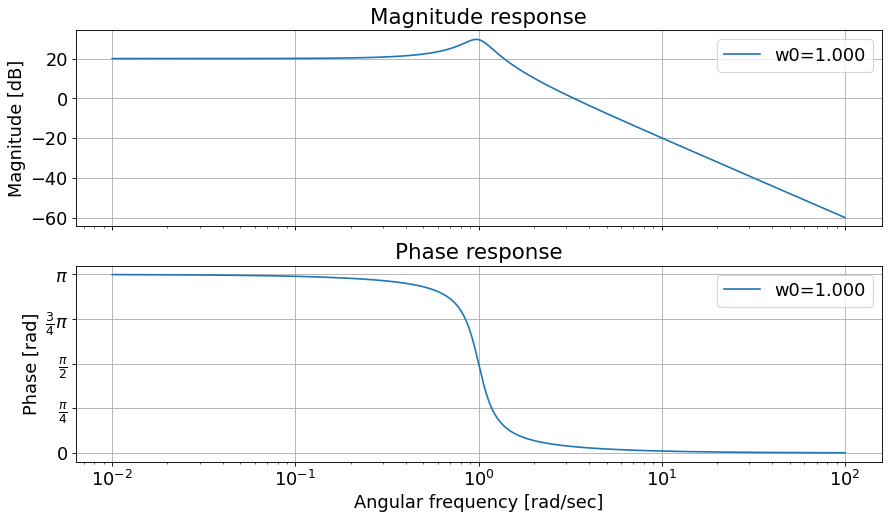

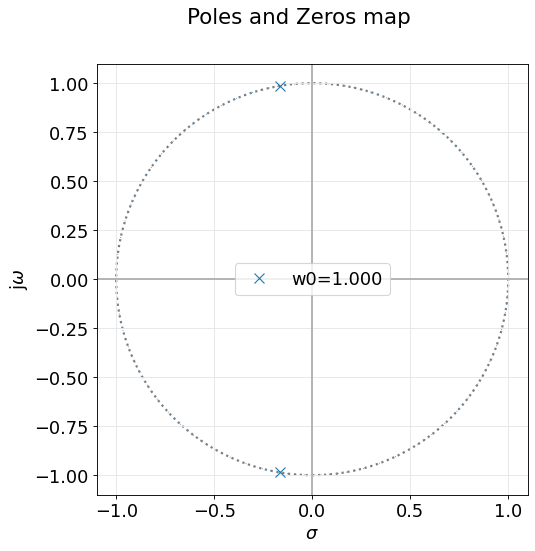

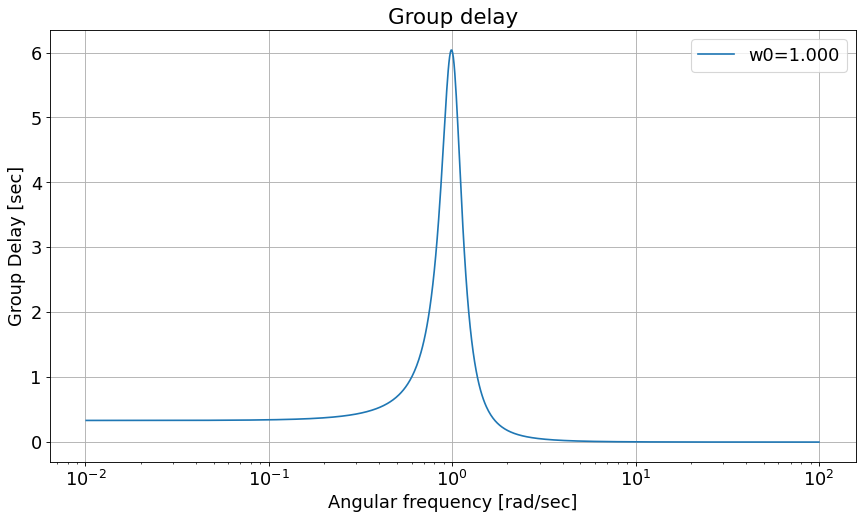

In [3]:
plotearFtrans(w0=1, Q=3,K=-10,tipo="lp",wn=0)

### Simulación en  LTspice

#### Circuito:
<img src="./rsc/sim/circuito.png"  /> 

#### Respuesta de modulo y fase
<img src="./rsc/sim/respuesta_fase.png" align="right" width="400" /> 
<img src="./rsc/sim/respuesta_modulo.png" align="left" width="400"  /> 

#### Parámetros caracteristicos del filtro:
<img src="./rsc/sim/cursor.png" align="center" width="400"  /> 

Frecuencia de corte del filtro:
\begin{equation}
f_0 = \frac{\omega_0}{2\pi} = 159 mHz \space\space f_{0sim} = 158,48 mHz
\end{equation}

El valor de Q coincide aproximadamente con el sobre pico:
\begin{equation}
Q_{veces} = 3  \rightarrow Q_{dB} = 20log3 = 9,54 \space\space Q_{sim} = 9,49
\end{equation}

En la frecuencia de corte la rotación de fase es de 90°

---------------------------------------------------------------------------------------------------------
### Funciones auxiliares

In [2]:
#Función para graficar Modulo, Fase, Diagrama de polos y ceros y Retardo de grupo de una función transferencia 
#Recibe los parámetros:
    #w0: Frecuencia de corte del filtro.
    #Q: Factor de calidad del filtro.
    #K: Ganancia en VECES CON SIGNO DE FASE
    #tipo: String para el tipo de filtro ("lp","hp","bp","ap","n")
    #wn: Frecuencia suprimida (solo para filtro Notch)

def plotearFtrans(w0,Q,K,tipo, wn):
    from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot
    from scipy.signal import TransferFunction
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    
    plt.figure(1)
    plt.close(1)

    fig_sz_x = 13
    fig_sz_y = 7
    fig_dpi = 80 # dpi
    fig_font_size = 16

    mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
    mpl.rcParams['figure.dpi'] = fig_dpi
    plt.rcParams.update({'font.size':fig_font_size})
    
    p0 = 0 
    p1 = 0
    p2 = 0
    if(tipo == "lp"):
        p0 = K*w0*w0
    elif(tipo == "bp"):
        p1 = K*w0/Q
    elif(tipo == "hp"):
        p2 = K
    elif(tipo == "n"):
        p2 = K
        p0 = K*wn*wn
    elif(tipo == "ap"):
        p0 = K*w0*w0
        p1 = -K*w0/Q
        p2 = K
    
    my_tf = TransferFunction( [p2,p1,p0], [1,w0/Q,w0*w0] )

    bodePlot(my_tf, fig_id=1, filter_description = 'w0={:3.3f}'.format(w0) )

    pzmap(my_tf, fig_id=2, filter_description = 'w0={:3.3f}'.format(w0)) #S plane pole/zero plot

    GroupDelay(my_tf, fig_id=3, filter_description = 'w0={:3.3f}'.format(w0))
    

---------------------------------------------------------------------------------------------------